In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import numpy as np

In [5]:
df = pd.read_csv("Mall_Customers.csv")

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


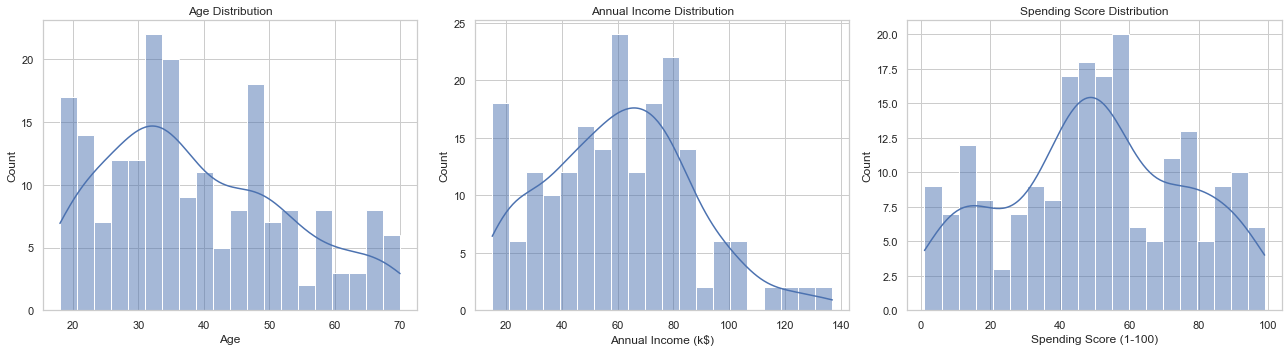

In [8]:
sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], bins=20, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=ax[1])
ax[1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=ax[2])
ax[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()


In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

C:\Users\Kerillos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kerillos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kerillos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kerillos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

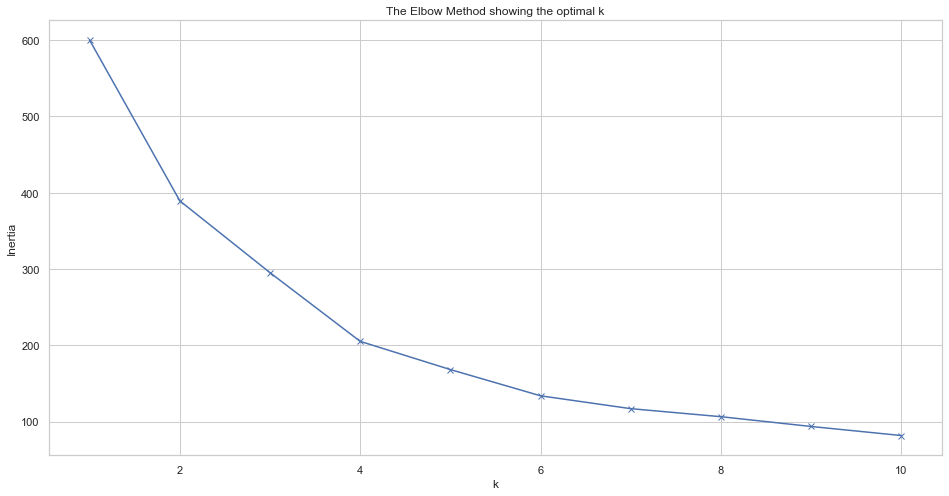

In [10]:
inertia = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(scaled_features)
    inertia.append(kmeanModel.inertia_)

# Plotting
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
k = 5 
kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_features)
df['Cluster'] = kmeans.labels_

df.head()


C:\Users\Kerillos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kerillos\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [12]:
cluster_analysis = df.groupby('Cluster').mean()
cluster_analysis

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,159.743590,39.871795,86.102564,19.358974
1,83.872340,55.638298,54.382979,48.851064
2,55.648148,25.185185,41.092593,62.240741
3,24.100000,46.250000,26.750000,18.350000
4,161.025000,32.875000,86.100000,81.525000
